In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from sklearn.metrics import  mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')
     

In [2]:
features=pd.read_csv('C:\\Users\\Admin\\Desktop\\vscode\\Features_data_set.csv')
stores=pd.read_csv('C:\\Users\\Admin\\Desktop\\vscode\\stores_data_set.csv')
sales=pd.read_csv('C:\\Users\\Admin\\Desktop\\vscode\\sales_data_set.csv')
features_stores=features.merge(stores, on ='Store', how='left')
df=sales.merge(features_stores, on = ['Store','Date','IsHoliday'], how='left')

In [3]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [4]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [6]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [7]:
df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: np.nan if x<=1 else x)

In [8]:
df.dropna(subset=['Weekly_Sales'], inplace=True)

In [9]:
df['Weekly_Sales'].sort_values(ascending=True)

303823         1.01
197218         1.01
130384         1.02
177106         1.02
373303         1.04
            ...    
135665    474330.10
337961    627962.93
95425     630999.19
338013    649770.18
95373     693099.36
Name: Weekly_Sales, Length: 419395, dtype: float64

In [10]:
df.shape

(419395, 16)

In [11]:
df['MarkDown1'].fillna(0, inplace=True)
df['MarkDown2'].fillna(0, inplace=True)
df['MarkDown3'].fillna(0, inplace=True)
df['MarkDown4'].fillna(0, inplace=True)
df['MarkDown5'].fillna(0, inplace=True)

In [12]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [13]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [14]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [15]:
df['Type']=df['Type'].map({'A':1,'B':2,'C':3})
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,1,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,1,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,1,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,1,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,2,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,2,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2,118221


In [16]:
df['IsHoliday'].unique()

array([False,  True])

In [17]:
df['IsHoliday']=df['IsHoliday'].astype(int)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,1,151315
1,1,1,12/02/2010,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,151315
2,1,1,19/02/2010,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,1,151315
3,1,1,26/02/2010,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,1,151315
4,1,1,05/03/2010,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,1,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2,118221
421566,45,98,05/10/2012,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,2,118221
421567,45,98,12/10/2012,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,2,118221
421568,45,98,19/10/2012,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2,118221


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419395 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         419395 non-null  int64  
 1   Dept          419395 non-null  int64  
 2   Date          419395 non-null  object 
 3   Weekly_Sales  419395 non-null  float64
 4   IsHoliday     419395 non-null  int32  
 5   Temperature   419395 non-null  float64
 6   Fuel_Price    419395 non-null  float64
 7   MarkDown1     419395 non-null  float64
 8   MarkDown2     419395 non-null  float64
 9   MarkDown3     419395 non-null  float64
 10  MarkDown4     419395 non-null  float64
 11  MarkDown5     419395 non-null  float64
 12  CPI           419395 non-null  float64
 13  Unemployment  419395 non-null  float64
 14  Type          419395 non-null  int64  
 15  Size          419395 non-null  int64  
dtypes: float64(10), int32(1), int64(4), object(1)
memory usage: 52.8+ MB


In [19]:
df['Total_MarkDown']=df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Total_MarkDown
0,1,1,05/02/2010,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0.0
1,1,1,12/02/2010,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315,0.0
2,1,1,19/02/2010,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,151315,0.0
3,1,1,26/02/2010,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,151315,0.0
4,1,1,05/03/2010,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,151315,0.0


In [20]:
df['Expected_Weekly_Sales']=df['Weekly_Sales']+df['Total_MarkDown']
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Total_MarkDown,Expected_Weekly_Sales
0,1,1,05/02/2010,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0.0,24924.50
1,1,1,12/02/2010,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315,0.0,46039.49
2,1,1,19/02/2010,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,151315,0.0,41595.55
3,1,1,26/02/2010,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,151315,0.0,19403.54
4,1,1,05/03/2010,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,151315,0.0,21827.90


In [21]:
df1= df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4','MarkDown5'])
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Total_MarkDown,Expected_Weekly_Sales
0,1,1,05/02/2010,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,0.00,24924.50
1,1,1,12/02/2010,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,0.00,46039.49
2,1,1,19/02/2010,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,0.00,41595.55
3,1,1,26/02/2010,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,0.00,19403.54
4,1,1,05/03/2010,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,0.00,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0,64.88,3.997,192.013558,8.684,2,118221,9468.01,9976.38
421566,45,98,05/10/2012,628.10,0,64.89,3.985,192.170412,8.667,2,118221,9659.00,10287.10
421567,45,98,12/10/2012,1061.02,0,54.47,4.000,192.327265,8.667,2,118221,6554.03,7615.05
421568,45,98,19/10/2012,760.01,0,56.47,3.969,192.330854,8.667,2,118221,3982.42,4742.43


In [ ]:
# p-value always to be less than 0.05

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419395 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Store                  419395 non-null  int64  
 1   Dept                   419395 non-null  int64  
 2   Date                   419395 non-null  object 
 3   Weekly_Sales           419395 non-null  float64
 4   IsHoliday              419395 non-null  int32  
 5   Temperature            419395 non-null  float64
 6   Fuel_Price             419395 non-null  float64
 7   CPI                    419395 non-null  float64
 8   Unemployment           419395 non-null  float64
 9   Type                   419395 non-null  int64  
 10  Size                   419395 non-null  int64  
 11  Total_MarkDown         419395 non-null  float64
 12  Expected_Weekly_Sales  419395 non-null  float64
dtypes: float64(7), int32(1), int64(4), object(1)
memory usage: 43.2+ MB


In [26]:
from scipy import stats
### threshold for hypo test = 0.05
_, pvalue = stats.ttest_ind(df1['Weekly_Sales'],df1['Total_MarkDown'])
pvalue
_, pvalue = stats.ttest_ind(df1['Weekly_Sales'],df1['Expected_Weekly_Sales'])
pvalue
_, pvalue = stats.ttest_ind(df1['Weekly_Sales'],df1['Fuel_Price'])
pvalue

0.0

In [27]:
# find outliers - box plot & skewed data - hist plot and violin plot
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

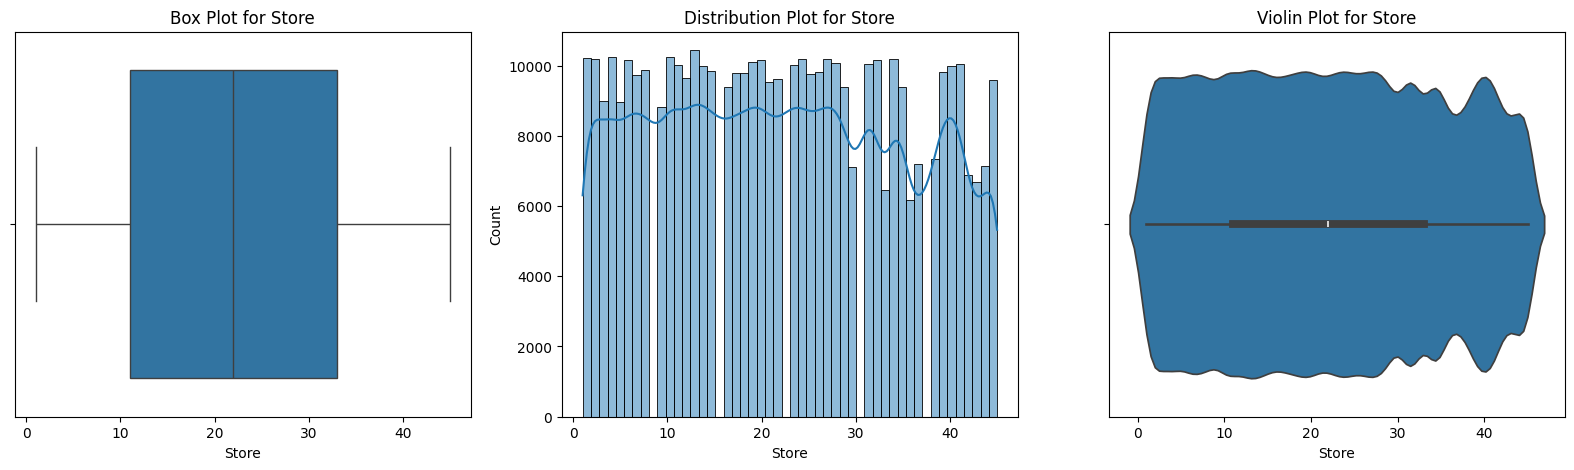

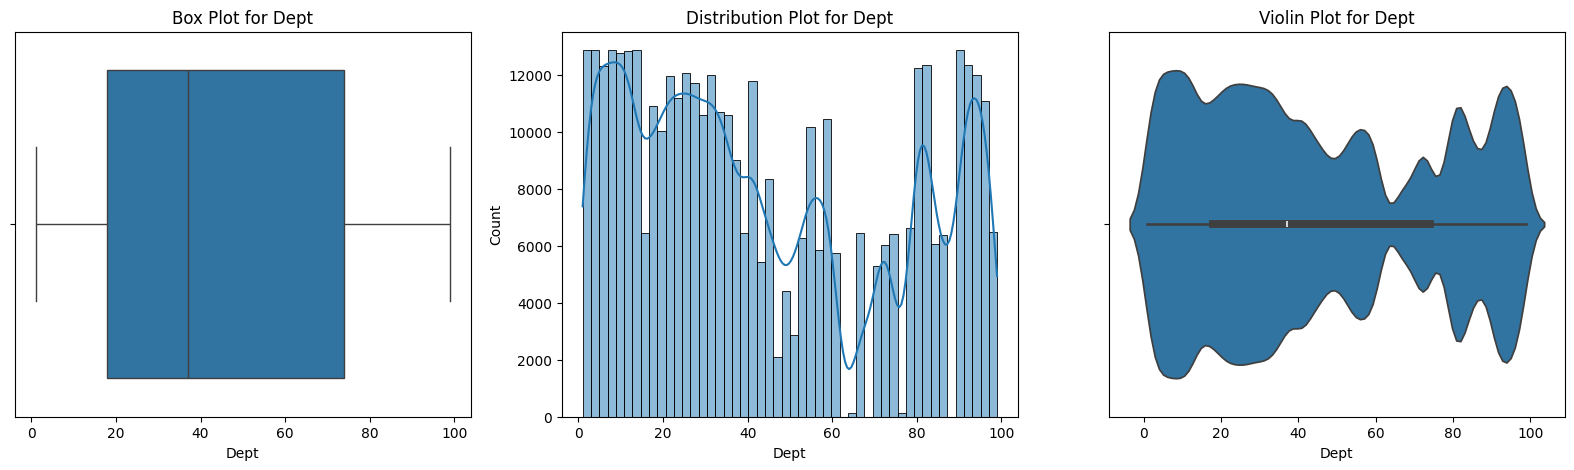

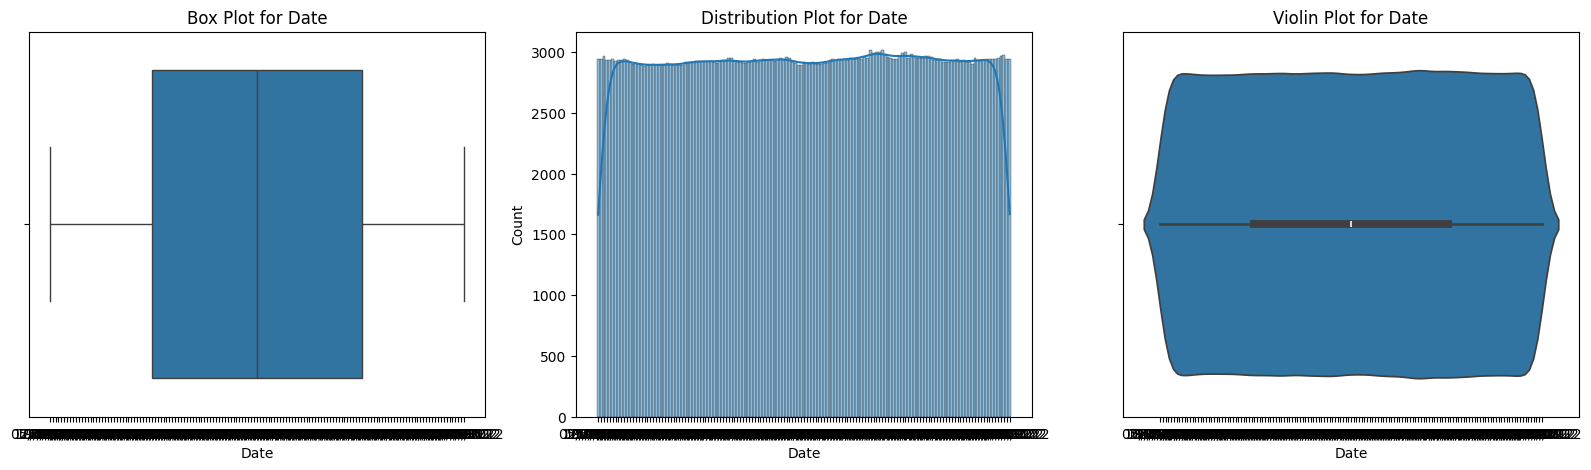

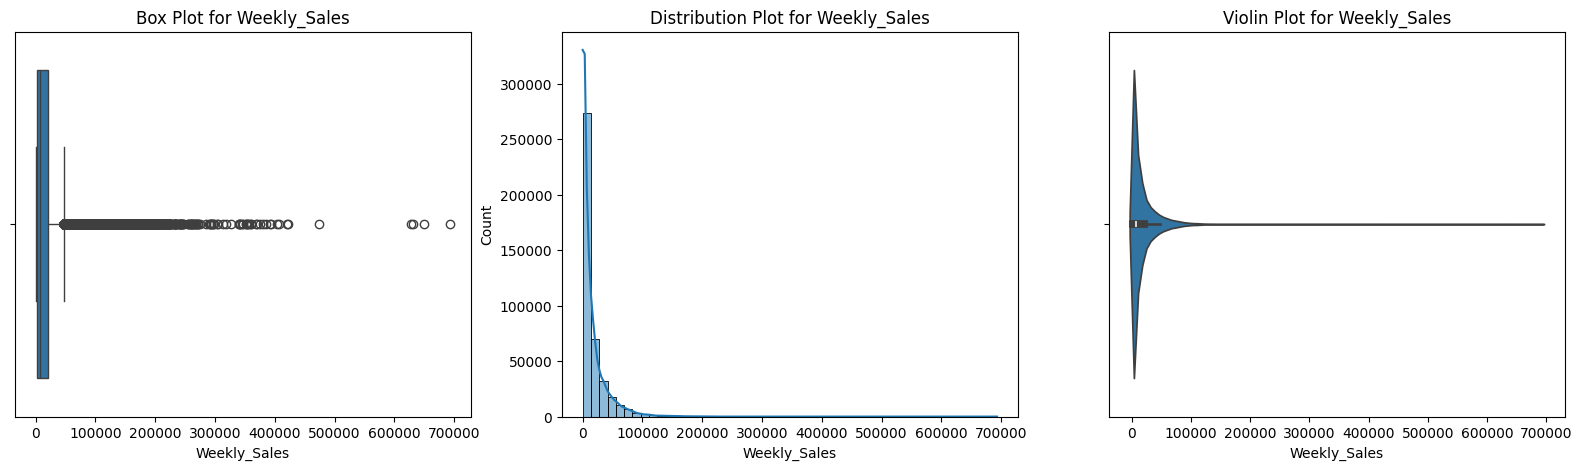

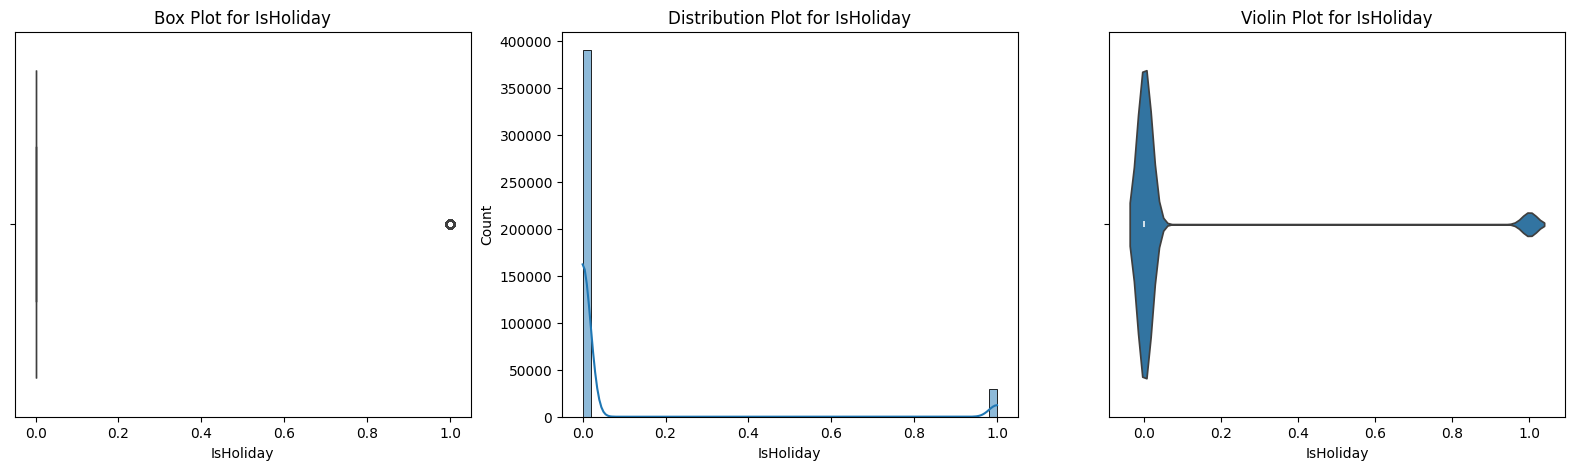

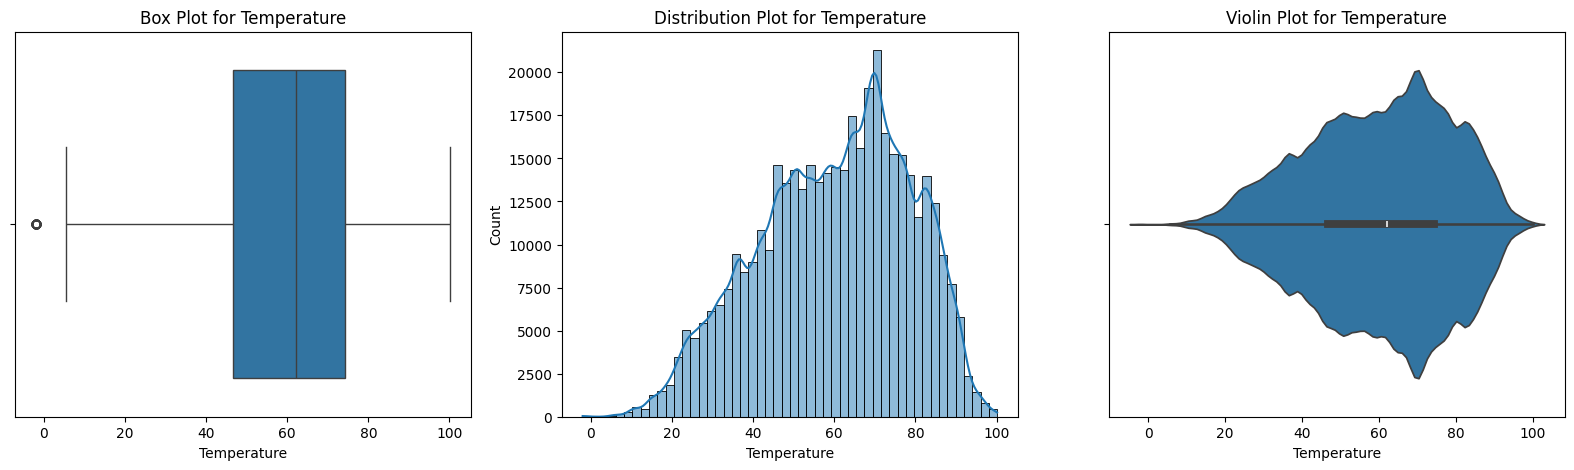

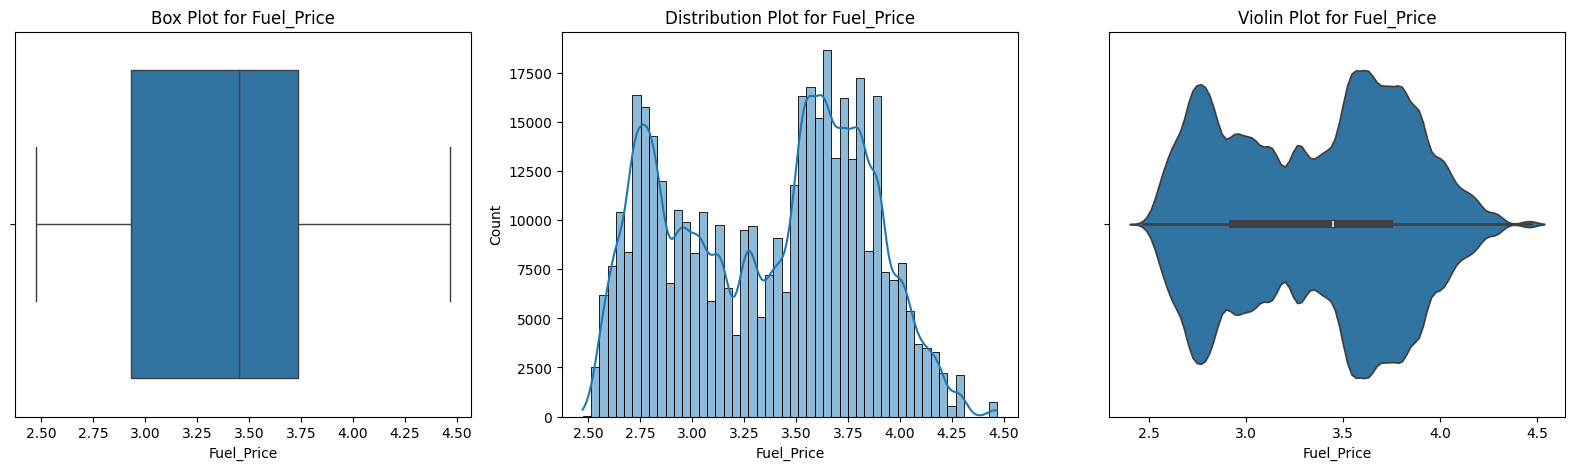

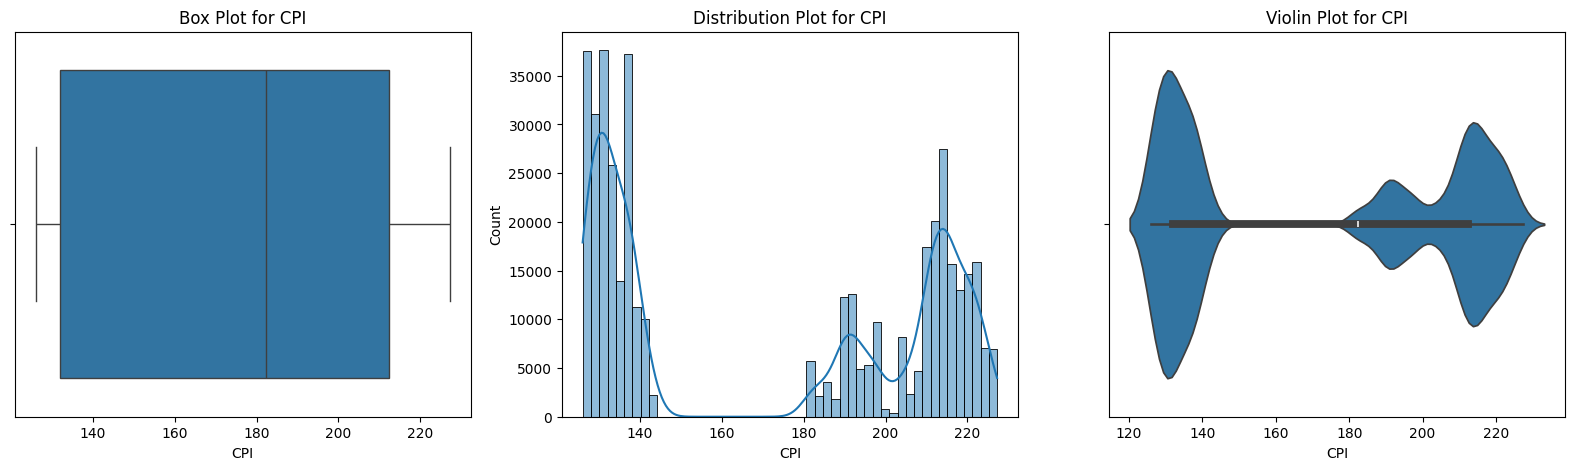

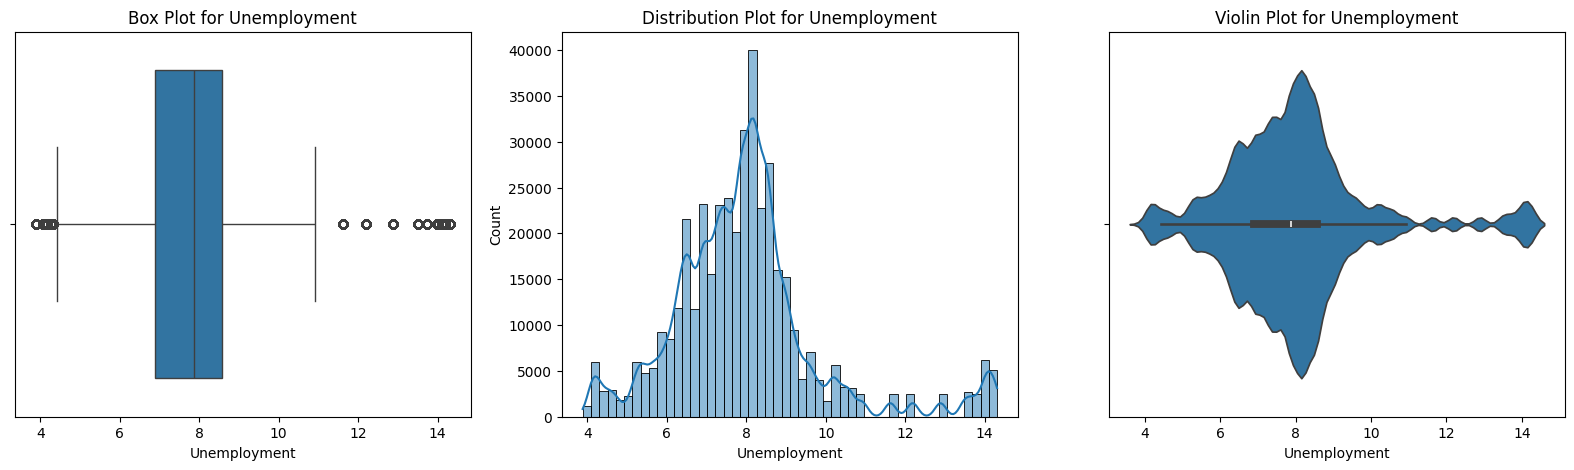

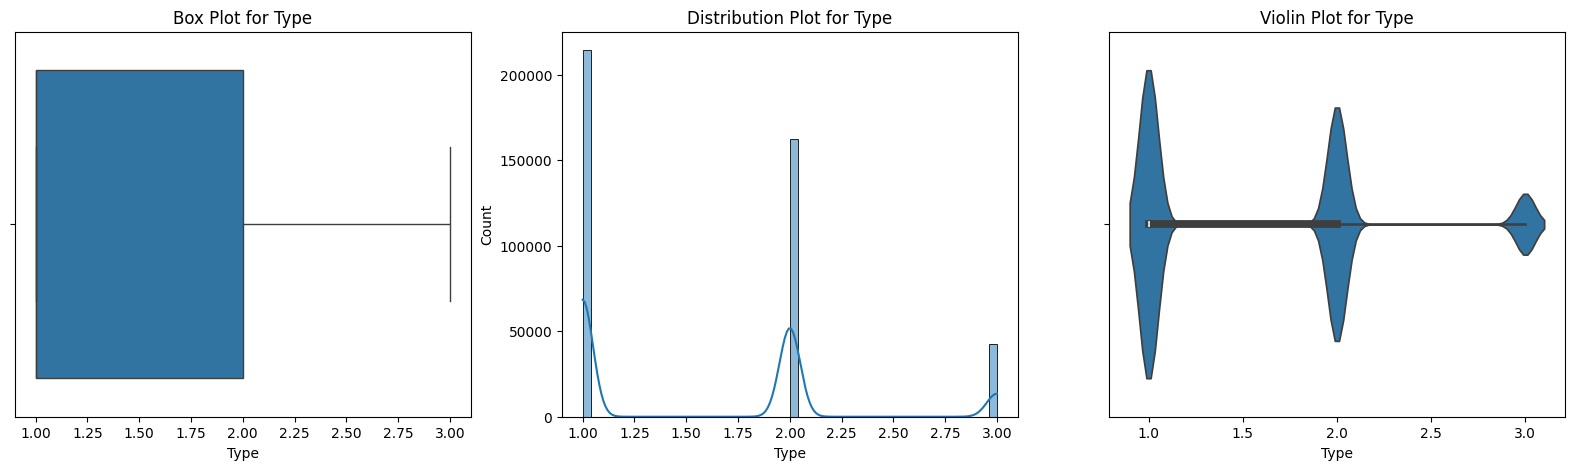

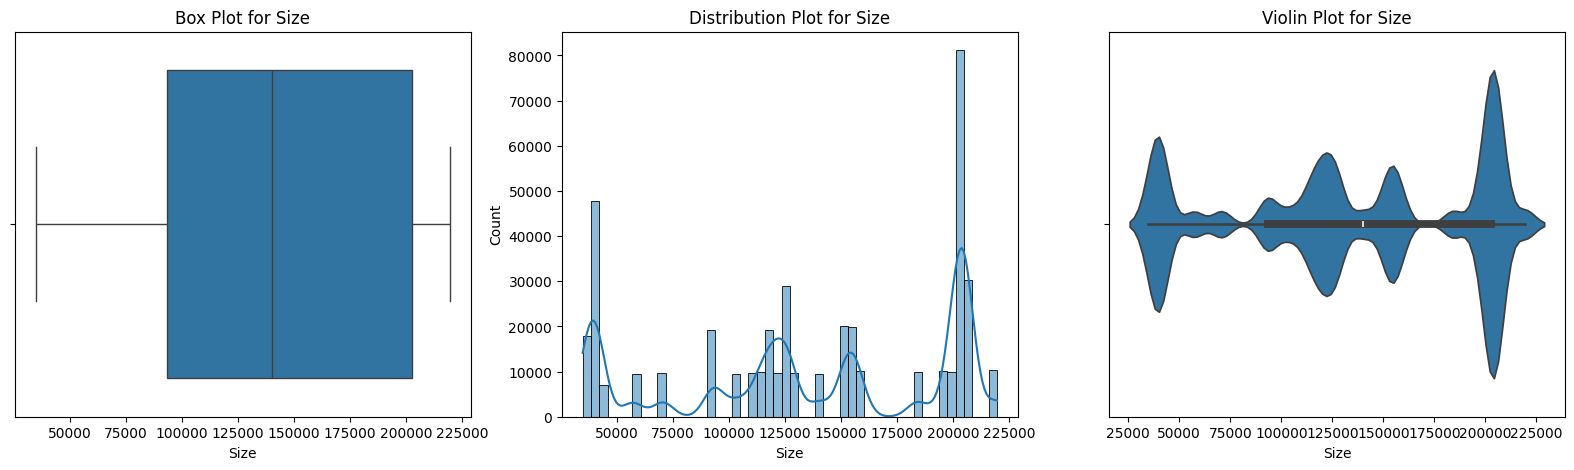

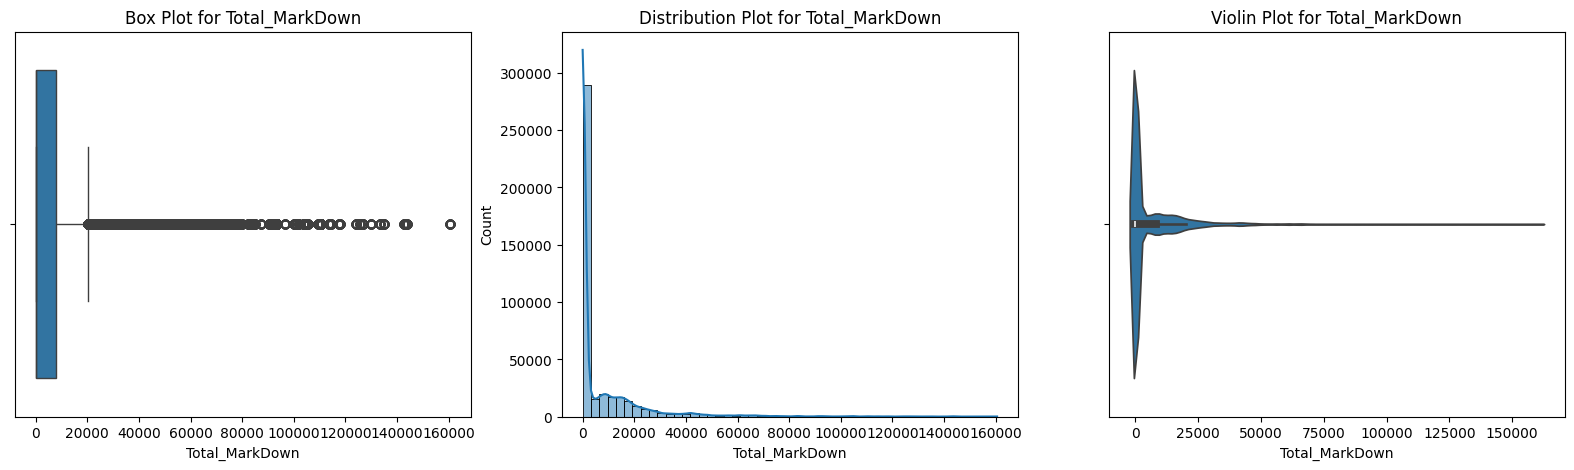

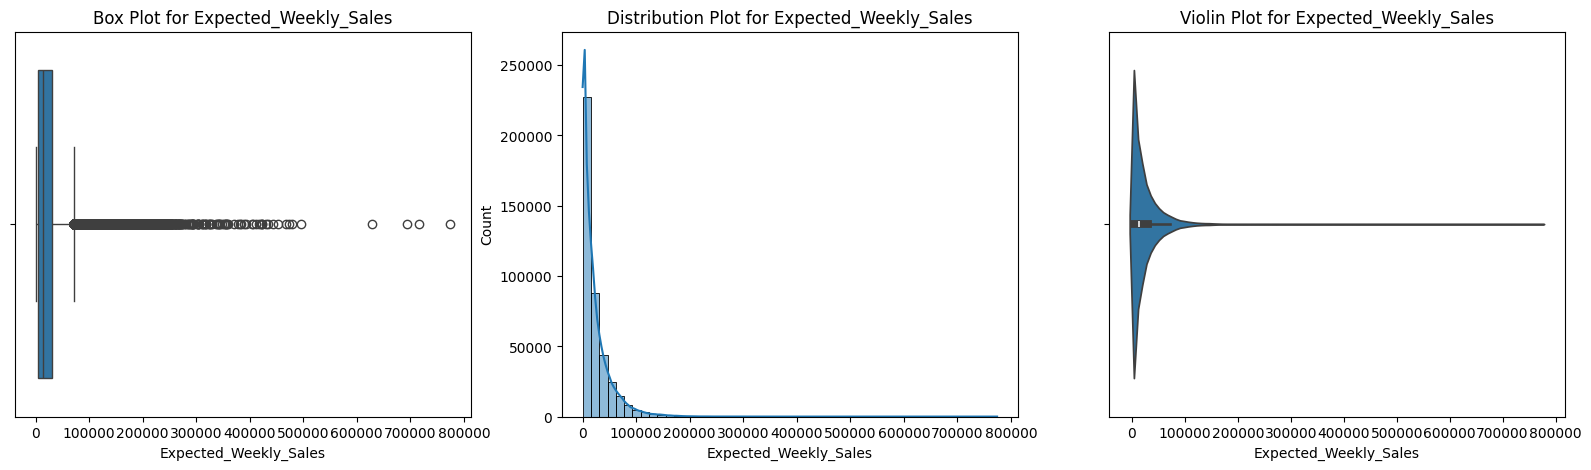

In [28]:
for i in df1.columns:
    plot(df1,i)

In [29]:
df2=df1.copy()
df2['Weekly_Sales_log'] = np.log(df2['Weekly_Sales'])
df2['Fuel_Price_log'] = np.log(df2['Fuel_Price'])
df2['Expected_Weekly_Sales_log'] = np.log(df2['Expected_Weekly_Sales'])
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Total_MarkDown,Expected_Weekly_Sales,Weekly_Sales_log,Fuel_Price_log,Expected_Weekly_Sales_log
0,1,1,05/02/2010,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,0.00,24924.50,10.123607,0.944684,10.123607
1,1,1,12/02/2010,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,0.00,46039.49,10.737255,0.935309,10.737255
2,1,1,19/02/2010,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,0.00,41595.55,10.635748,0.921875,10.635748
3,1,1,26/02/2010,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,0.00,19403.54,9.873211,0.940398,9.873211
4,1,1,05/03/2010,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,0.00,21827.90,9.990944,0.965081,9.990944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0,64.88,3.997,192.013558,8.684,2,118221,9468.01,9976.38,6.231210,1.385544,9.207976
421566,45,98,05/10/2012,628.10,0,64.89,3.985,192.170412,8.667,2,118221,9659.00,10287.10,6.442699,1.382537,9.238646
421567,45,98,12/10/2012,1061.02,0,54.47,4.000,192.327265,8.667,2,118221,6554.03,7615.05,6.966986,1.386294,8.937882
421568,45,98,19/10/2012,760.01,0,56.47,3.969,192.330854,8.667,2,118221,3982.42,4742.43,6.633332,1.378514,8.464305


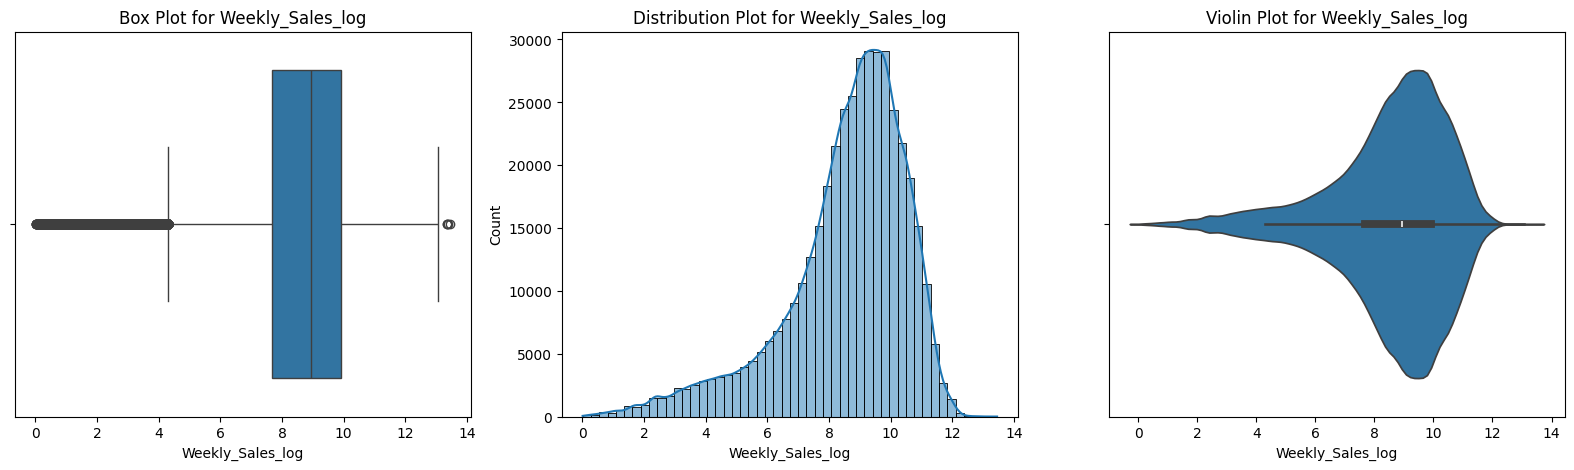

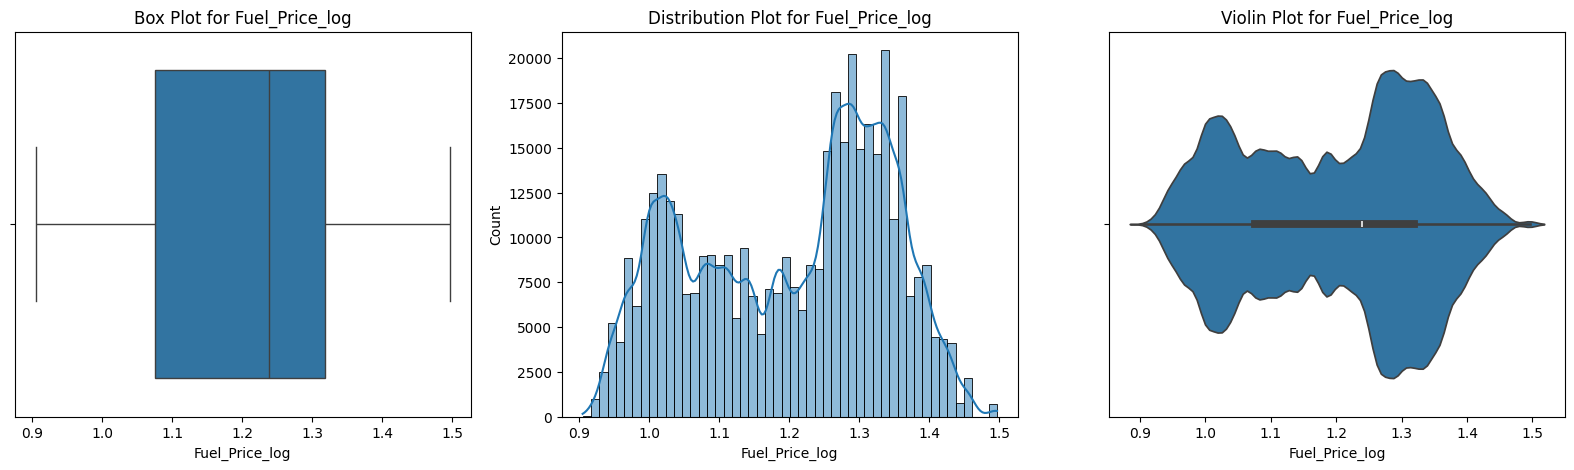

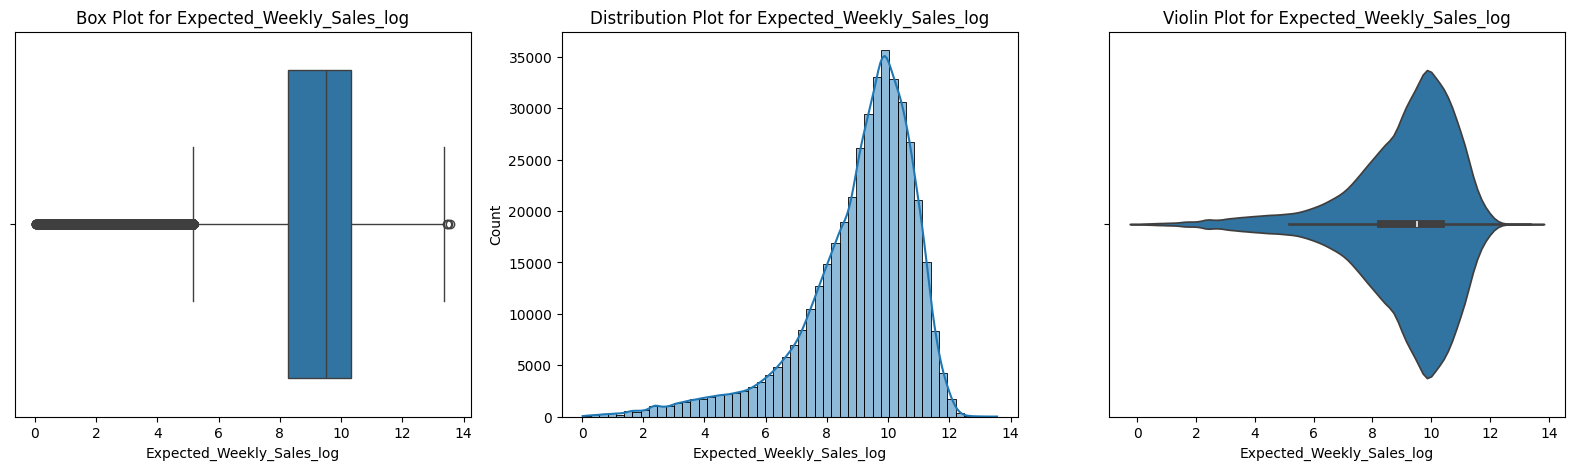

In [30]:
for i in ['Weekly_Sales_log', 'Fuel_Price_log','Expected_Weekly_Sales_log']:
    plot(df2, i)

In [31]:
#IQR:
df3 = df2.copy()
df3

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Total_MarkDown,Expected_Weekly_Sales,Weekly_Sales_log,Fuel_Price_log,Expected_Weekly_Sales_log
0,1,1,05/02/2010,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,0.00,24924.50,10.123607,0.944684,10.123607
1,1,1,12/02/2010,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,0.00,46039.49,10.737255,0.935309,10.737255
2,1,1,19/02/2010,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,0.00,41595.55,10.635748,0.921875,10.635748
3,1,1,26/02/2010,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,0.00,19403.54,9.873211,0.940398,9.873211
4,1,1,05/03/2010,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,0.00,21827.90,9.990944,0.965081,9.990944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0,64.88,3.997,192.013558,8.684,2,118221,9468.01,9976.38,6.231210,1.385544,9.207976
421566,45,98,05/10/2012,628.10,0,64.89,3.985,192.170412,8.667,2,118221,9659.00,10287.10,6.442699,1.382537,9.238646
421567,45,98,12/10/2012,1061.02,0,54.47,4.000,192.327265,8.667,2,118221,6554.03,7615.05,6.966986,1.386294,8.937882
421568,45,98,19/10/2012,760.01,0,56.47,3.969,192.330854,8.667,2,118221,3982.42,4742.43,6.633332,1.378514,8.464305


In [32]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper = df[column].quantile(0.75) + (1.5*iqr)
    lower = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower, upper)

In [33]:
outlier(df3, 'Weekly_Sales_log')
outlier(df3, 'Fuel_Price_log')
outlier(df3, 'Expected_Weekly_Sales_log')
df3

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Total_MarkDown,Expected_Weekly_Sales,Weekly_Sales_log,Fuel_Price_log,Expected_Weekly_Sales_log
0,1,1,05/02/2010,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,0.00,24924.50,10.123607,0.944684,10.123607
1,1,1,12/02/2010,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,0.00,46039.49,10.737255,0.935309,10.737255
2,1,1,19/02/2010,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,0.00,41595.55,10.635748,0.921875,10.635748
3,1,1,26/02/2010,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,0.00,19403.54,9.873211,0.940398,9.873211
4,1,1,05/03/2010,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,0.00,21827.90,9.990944,0.965081,9.990944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0,64.88,3.997,192.013558,8.684,2,118221,9468.01,9976.38,6.231210,1.385544,9.207976
421566,45,98,05/10/2012,628.10,0,64.89,3.985,192.170412,8.667,2,118221,9659.00,10287.10,6.442699,1.382537,9.238646
421567,45,98,12/10/2012,1061.02,0,54.47,4.000,192.327265,8.667,2,118221,6554.03,7615.05,6.966986,1.386294,8.937882
421568,45,98,19/10/2012,760.01,0,56.47,3.969,192.330854,8.667,2,118221,3982.42,4742.43,6.633332,1.378514,8.464305


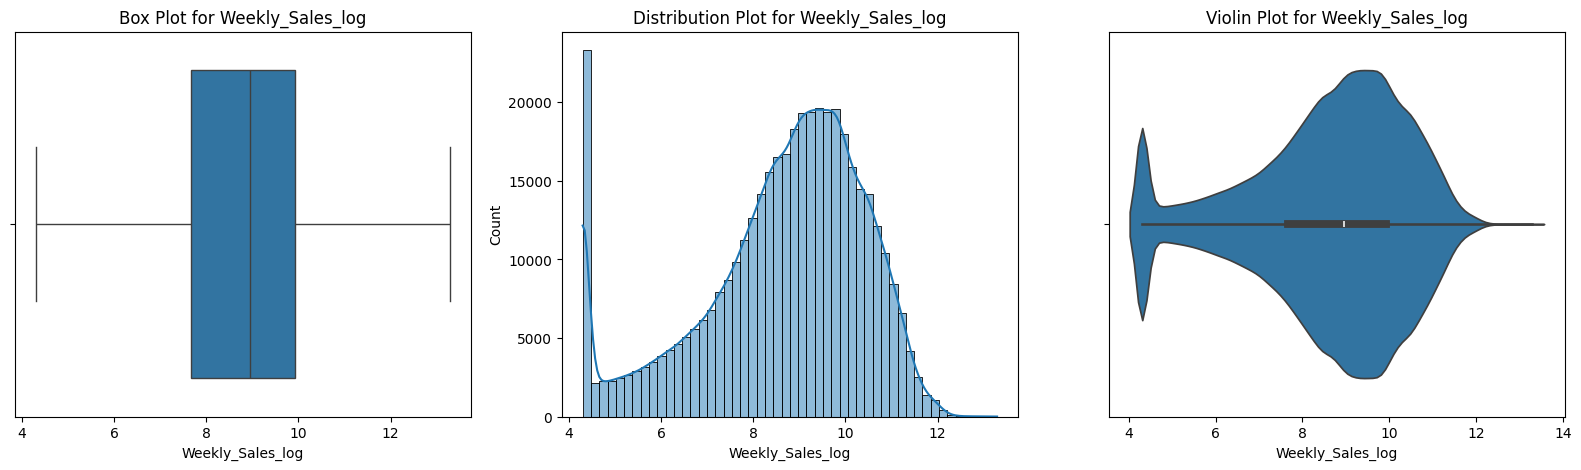

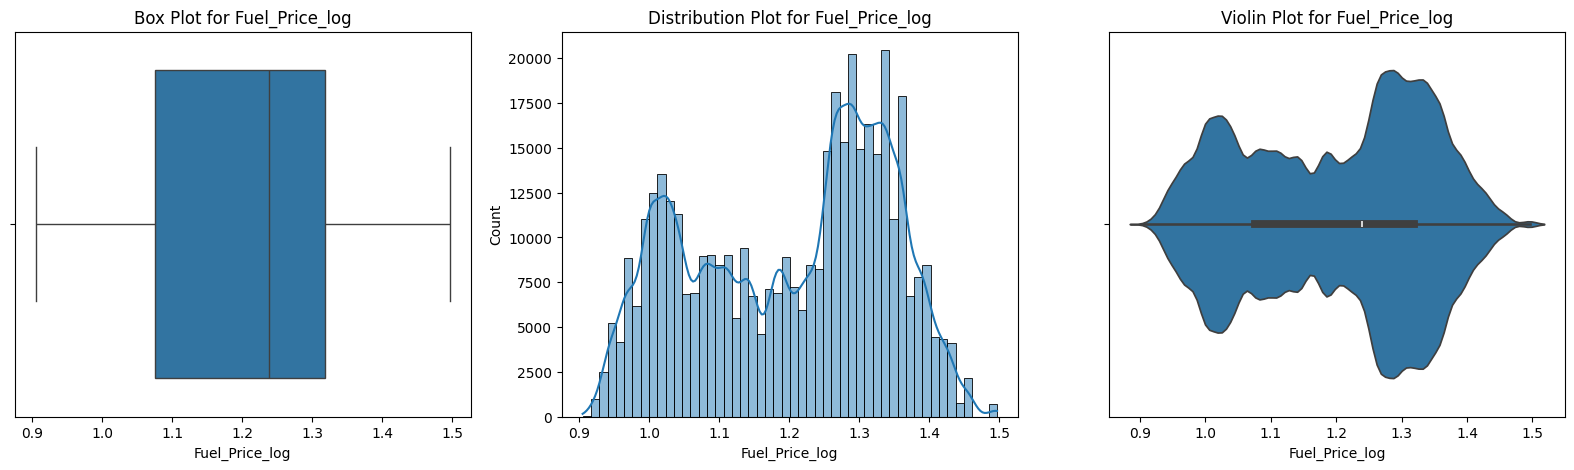

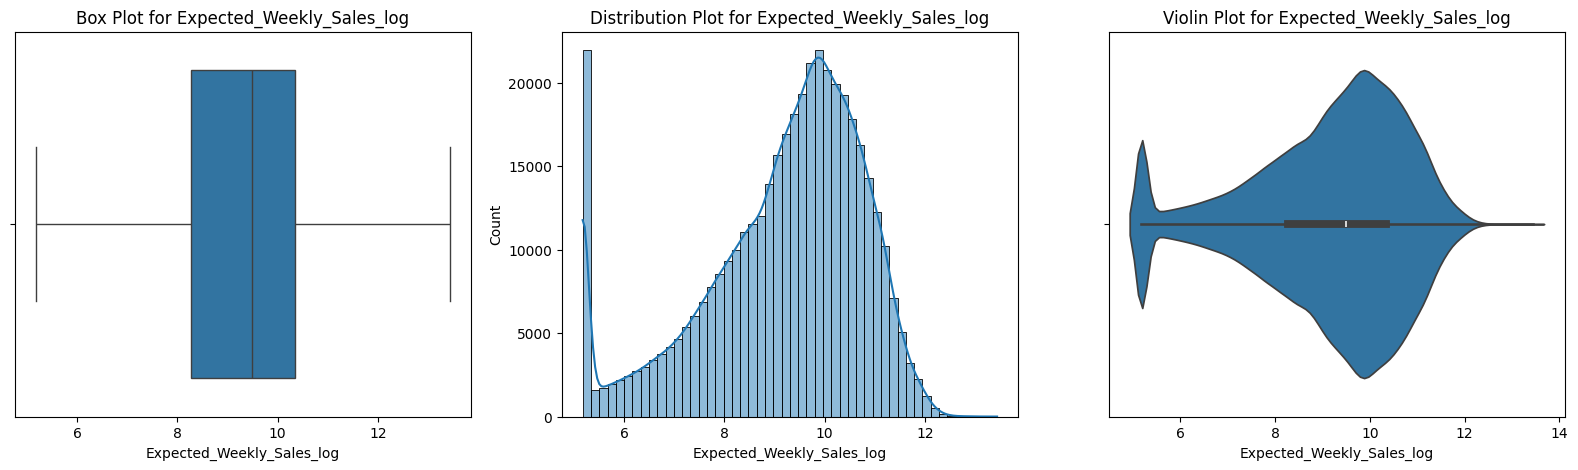

In [34]:
for i in ['Weekly_Sales_log', 'Fuel_Price_log','Expected_Weekly_Sales_log']:
    plot(df3, i)

In [35]:
df3 = df2.drop(columns=['Weekly_Sales','Fuel_Price','Expected_Weekly_Sales'])
df3

,Store,Dept,Date,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Total_MarkDown,Weekly_Sales_log,Fuel_Price_log,Expected_Weekly_Sales_log
0,1,1,05/02/2010,0,42.31,211.096358,8.106,1,151315,0.00,10.123607,0.944684,10.123607
1,1,1,12/02/2010,1,38.51,211.242170,8.106,1,151315,0.00,10.737255,0.935309,10.737255
2,1,1,19/02/2010,0,39.93,211.289143,8.106,1,151315,0.00,10.635748,0.921875,10.635748
3,1,1,26/02/2010,0,46.63,211.319643,8.106,1,151315,0.00,9.873211,0.940398,9.873211
4,1,1,05/03/2010,0,46.50,211.350143,8.106,1,151315,0.00,9.990944,0.965081,9.990944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,0,64.88,192.013558,8.684,2,118221,9468.01,6.231210,1.385544,9.207976
421566,45,98,05/10/2012,0,64.89,192.170412,8.667,2,118221,9659.00,6.442699,1.382537,9.238646
421567,45,98,12/10/2012,0,54.47,192.327265,8.667,2,118221,6554.03,6.966986,1.386294,8.937882
421568,45,98,19/10/2012,0,56.47,192.330854,8.667,2,118221,3982.42,6.633332,1.378514,8.464305


In [36]:
df3

,Store,Dept,Date,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Total_MarkDown,Weekly_Sales_log,Fuel_Price_log,Expected_Weekly_Sales_log
0,1,1,05/02/2010,0,42.31,211.096358,8.106,1,151315,0.00,10.123607,0.944684,10.123607
1,1,1,12/02/2010,1,38.51,211.242170,8.106,1,151315,0.00,10.737255,0.935309,10.737255
2,1,1,19/02/2010,0,39.93,211.289143,8.106,1,151315,0.00,10.635748,0.921875,10.635748
3,1,1,26/02/2010,0,46.63,211.319643,8.106,1,151315,0.00,9.873211,0.940398,9.873211
4,1,1,05/03/2010,0,46.50,211.350143,8.106,1,151315,0.00,9.990944,0.965081,9.990944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,0,64.88,192.013558,8.684,2,118221,9468.01,6.231210,1.385544,9.207976
421566,45,98,05/10/2012,0,64.89,192.170412,8.667,2,118221,9659.00,6.442699,1.382537,9.238646
421567,45,98,12/10/2012,0,54.47,192.327265,8.667,2,118221,6554.03,6.966986,1.386294,8.937882
421568,45,98,19/10/2012,0,56.47,192.330854,8.667,2,118221,3982.42,6.633332,1.378514,8.464305


<Axes: >

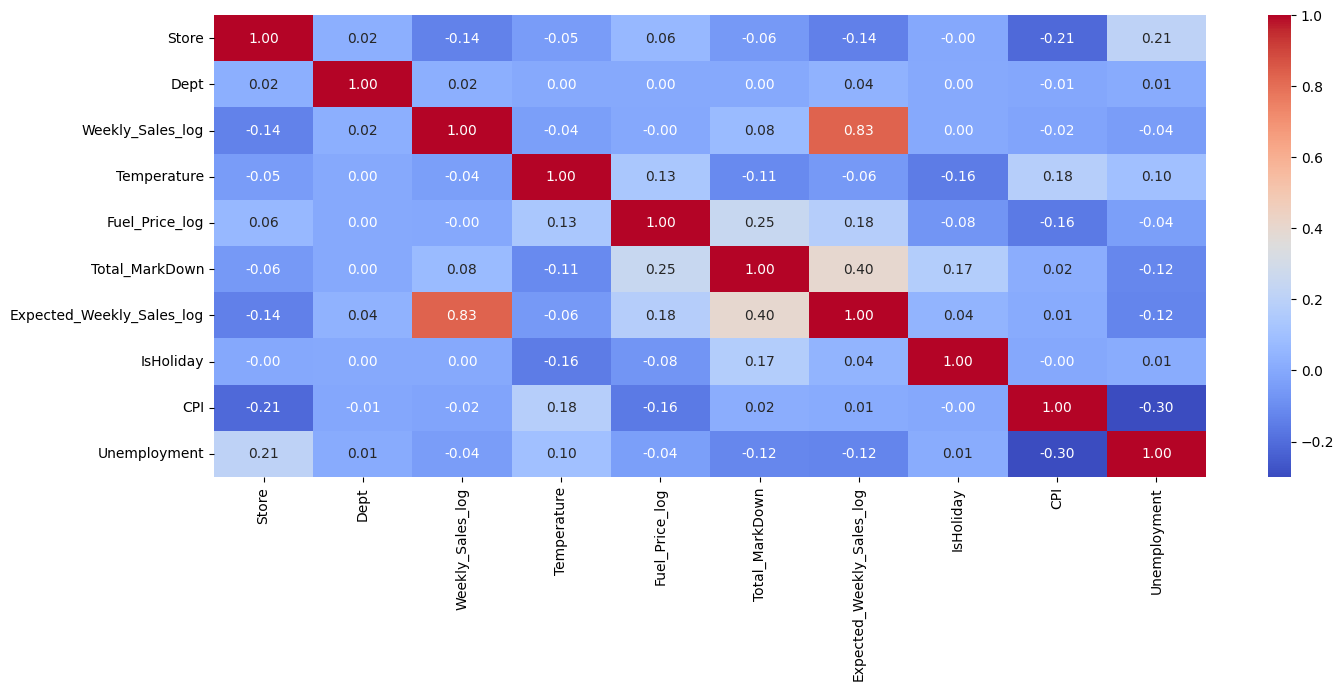

In [37]:
col = ['Store','Dept','Weekly_Sales_log','Temperature','Fuel_Price_log','Total_MarkDown','Expected_Weekly_Sales_log','IsHoliday','CPI','Unemployment']
corr_data = df3[col].corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr_data, annot=True,cmap="coolwarm",fmt=".2f")

In [38]:
from datetime import datetime, timedelta

In [39]:
df3['Date_1'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y', errors='coerce').dt.date

In [40]:
df3['Date_1'] = pd.to_datetime(df3['Date_1'])

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
df3['Day'] = df3['Date_1'].dt.day
df3['month'] = df3['Date_1'].dt.month
df3['year'] = df3['Date_1'].dt.year
df3

,Store,Dept,Date,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Total_MarkDown,Weekly_Sales_log,Fuel_Price_log,Expected_Weekly_Sales_log,Date_1,Day,month,year
0,1,1,05/02/2010,0,42.31,211.096358,8.106,1,151315,0.00,10.123607,0.944684,10.123607,2010-02-05,5,2,2010
1,1,1,12/02/2010,1,38.51,211.242170,8.106,1,151315,0.00,10.737255,0.935309,10.737255,2010-02-12,12,2,2010
2,1,1,19/02/2010,0,39.93,211.289143,8.106,1,151315,0.00,10.635748,0.921875,10.635748,2010-02-19,19,2,2010
3,1,1,26/02/2010,0,46.63,211.319643,8.106,1,151315,0.00,9.873211,0.940398,9.873211,2010-02-26,26,2,2010
4,1,1,05/03/2010,0,46.50,211.350143,8.106,1,151315,0.00,9.990944,0.965081,9.990944,2010-03-05,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,0,64.88,192.013558,8.684,2,118221,9468.01,6.231210,1.385544,9.207976,2012-09-28,28,9,2012
421566,45,98,05/10/2012,0,64.89,192.170412,8.667,2,118221,9659.00,6.442699,1.382537,9.238646,2012-10-05,5,10,2012
421567,45,98,12/10/2012,0,54.47,192.327265,8.667,2,118221,6554.03,6.966986,1.386294,8.937882,2012-10-12,12,10,2012
421568,45,98,19/10/2012,0,56.47,192.330854,8.667,2,118221,3982.42,6.633332,1.378514,8.464305,2012-10-19,19,10,2012


In [41]:
df3.drop(columns=['Date','Date_1'],inplace=True)
df3

,Store,Dept,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Total_MarkDown,Weekly_Sales_log,Fuel_Price_log,Expected_Weekly_Sales_log,Day,month,year
0,1,1,0,42.31,211.096358,8.106,1,151315,0.00,10.123607,0.944684,10.123607,5,2,2010
1,1,1,1,38.51,211.242170,8.106,1,151315,0.00,10.737255,0.935309,10.737255,12,2,2010
2,1,1,0,39.93,211.289143,8.106,1,151315,0.00,10.635748,0.921875,10.635748,19,2,2010
3,1,1,0,46.63,211.319643,8.106,1,151315,0.00,9.873211,0.940398,9.873211,26,2,2010
4,1,1,0,46.50,211.350143,8.106,1,151315,0.00,9.990944,0.965081,9.990944,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,192.013558,8.684,2,118221,9468.01,6.231210,1.385544,9.207976,28,9,2012
421566,45,98,0,64.89,192.170412,8.667,2,118221,9659.00,6.442699,1.382537,9.238646,5,10,2012
421567,45,98,0,54.47,192.327265,8.667,2,118221,6554.03,6.966986,1.386294,8.937882,12,10,2012
421568,45,98,0,56.47,192.330854,8.667,2,118221,3982.42,6.633332,1.378514,8.464305,19,10,2012


In [42]:
df3.dtypes

Store                          int64
Dept                           int64
IsHoliday                      int32
Temperature                  float64
CPI                          float64
Unemployment                 float64
Type                           int64
Size                           int64
Total_MarkDown               float64
Weekly_Sales_log             float64
Fuel_Price_log               float64
Expected_Weekly_Sales_log    float64
Day                            int32
month                          int32
year                           int32
dtype: object

In [43]:
df3

,Store,Dept,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Total_MarkDown,Weekly_Sales_log,Fuel_Price_log,Expected_Weekly_Sales_log,Day,month,year
0,1,1,0,42.31,211.096358,8.106,1,151315,0.00,10.123607,0.944684,10.123607,5,2,2010
1,1,1,1,38.51,211.242170,8.106,1,151315,0.00,10.737255,0.935309,10.737255,12,2,2010
2,1,1,0,39.93,211.289143,8.106,1,151315,0.00,10.635748,0.921875,10.635748,19,2,2010
3,1,1,0,46.63,211.319643,8.106,1,151315,0.00,9.873211,0.940398,9.873211,26,2,2010
4,1,1,0,46.50,211.350143,8.106,1,151315,0.00,9.990944,0.965081,9.990944,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,192.013558,8.684,2,118221,9468.01,6.231210,1.385544,9.207976,28,9,2012
421566,45,98,0,64.89,192.170412,8.667,2,118221,9659.00,6.442699,1.382537,9.238646,5,10,2012
421567,45,98,0,54.47,192.327265,8.667,2,118221,6554.03,6.966986,1.386294,8.937882,12,10,2012
421568,45,98,0,56.47,192.330854,8.667,2,118221,3982.42,6.633332,1.378514,8.464305,19,10,2012


In [ ]:
df3.to_csv('Weekly sales Data.csv',index=False)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from sklearn.metrics import  mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd


In [42]:
x = df3.drop(columns=['Weekly_Sales_log'], axis=1)
y = df3['Weekly_Sales_log']

In [43]:
x

,Store,Dept,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Total_MarkDown,Fuel_Price_log,Expected_Weekly_Sales_log,Day,month,year
0,1,1,0,42.31,211.096358,8.106,1,151315,0.00,0.944684,10.123607,5,2,2010
1,1,1,1,38.51,211.242170,8.106,1,151315,0.00,0.935309,10.737255,12,2,2010
2,1,1,0,39.93,211.289143,8.106,1,151315,0.00,0.921875,10.635748,19,2,2010
3,1,1,0,46.63,211.319643,8.106,1,151315,0.00,0.940398,9.873211,26,2,2010
4,1,1,0,46.50,211.350143,8.106,1,151315,0.00,0.965081,9.990944,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,192.013558,8.684,2,118221,9468.01,1.385544,9.207976,28,9,2012
421566,45,98,0,64.89,192.170412,8.667,2,118221,9659.00,1.382537,9.238646,5,10,2012
421567,45,98,0,54.47,192.327265,8.667,2,118221,6554.03,1.386294,8.937882,12,10,2012
421568,45,98,0,56.47,192.330854,8.667,2,118221,3982.42,1.378514,8.464305,19,10,2012


In [44]:
x = df3.drop(columns=['Weekly_Sales_log'], axis=1)
y = df3['Weekly_Sales_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [45]:
x = df3.drop(columns=['Weekly_Sales_log'], axis=1)
y = df3['Weekly_Sales_log']


model = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test


(1.0, 0.9844545909941479)

In [46]:
dectree = DecisionTreeRegressor()

In [47]:
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features'    : ['sqrt', 'log2', None]}



In [48]:
grid_search = GridSearchCV(estimator=dectree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [49]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9861789532793491,
 'Mean Absolute Error': 0.044078301036297264,
 'Mean Squared Error': 0.055163540672641426,
 'Root Mean Squared Error': 0.23486919907182685}

In [50]:
#1).Store 2).Dept,3).IsHoliday 4).Temperature 5).CPI 6).Unemployment 7).Type 8).Size 9).Total_MarkDown 10).Fuel_Price_log 11).Expected_Weekly_Sales_log 12).Day 13).Month 14).Year
new_sample = np.array([[1, 1, 0, 42.31,211.096358,8.106,1,151315,0.00,np.log(2.572),np.log(24924.50),5,2,2010]])
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Weekly sales:', np.exp(new_pred))

Weekly sales: [24925.11999736]


In [54]:
#1).Store 2).Dept,3).IsHoliday 4).Temperature 5).CPI 6).Unemployment 7).Type 8).Size 9).Total_MarkDown 10).Fuel_Price_log 11).Expected_Weekly_Sales_log 12).Day 13).Month 14).Year
new_sample = np.array([[45, 98, 0, 64.88,192.013558,8.684,2,118221,98468.01,np.log(3.997),np.log(9976.38),28,9,2012]])
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Weekly sales:', np.exp(new_pred))

Weekly sales: [34.26279288]


In [53]:
#1).Store 2).Dept,3).IsHoliday 4).Temperature 5).CPI 6).Unemployment 7).Type 8).Size 9).Total_MarkDown 10).Fuel_Price_log 11).Expected_Weekly_Sales_log 12).Day 13).Month 14).Year
new_sample = np.array([[1, 1, 1, 38.51,211.242170,8.106,1,151315,0,np.log(2.548),np.log(46039.49),12,2,2010]])
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Weekly sales:', np.exp(new_pred))

Weekly sales: [46036.89566988]


In [55]:
import pickle
with open('decmodel.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('fscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [56]:
with open('C:\\Users\\Admin\\Desktop\\vscode\\decmodel.pkl', 'rb') as file:
                loaded_model = pickle.load(file)
with open('C:\\Users\\Admin\\Desktop\\vscode\\fscaler.pkl', 'rb') as f:
                scaler_loaded = pickle.load(f)


In [58]:
#1).Store 2).Dept,3).IsHoliday 4).Temperature 5).CPI 6).Unemployment 7).Type 8).Size 9).Total_MarkDown 10).Fuel_Price_log 11).Expected_Weekly_Sales_log 12).Day 13).Month 14).Year
new_sample = np.array([[45,98,0,58.5,192.308899,8.667,2,118221,5247.26,np.log(3.882),np.log(6324.06),26,10,2012]])
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Weekly sales:', np.exp(new_pred))

Weekly sales: [1070.81488627]


In [1]:
import mysql.connector
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="", 
)

print(mydb)
mycursor = mydb.cursor(buffered=True)

In [3]:
mycursor.execute("CREATE DATABASE IF NOT EXISTS super_market")

In [8]:
mycursor.execute("USE  super_market")

In [6]:
mycursor.execute('''CREATE TABLE IF NOT EXISTS weekly_sales_predictions (store INT,dept INT,Isholiday INT,temp FLOAT,cpi FLOAT,unemp FLOAT,
                                        store_type INT,size FLOAT,Total_MarkDown FLOAT,fuel_price FLOAT,expected_weekly_sale FLOAT,week_day INT, month INT,year INT, predicted_sales FLOAT)''')
mydb.commit()

In [9]:
mycursor.execute("""
    DELETE FROM weekly_sales_predictions 
    WHERE 
        store = 1
        AND dept = 1 
        AND Isholiday = 0                   
        AND temp = 42.31 
        AND cpi IS NULL 
        AND unemp IS NULL 
        AND store_type = 1 
        AND size IS NULL 
        AND Total_MarkDown IS NULL 
        AND fuel_price IS NULL
        AND expected_weekly_sale IS NULL 
        AND week_day = 1 
        AND month = 1 
        AND year = 2010 
        AND predicted_sales = 11781.9
""")
mydb.commit()

In [10]:
mycursor.execute("""
    DELETE FROM weekly_sales_predictions 
    WHERE 
        store = 1
        AND dept = 1 
        AND Isholiday = 0                   
        AND temp = 42.31 
        AND cpi IS NULL 
        AND unemp IS NULL 
        AND store_type = 1 
        AND size IS NULL 
        AND Total_MarkDown IS NULL 
        AND fuel_price IS NULL
        AND expected_weekly_sale IS NULL 
        AND week_day = 1 
        AND month = 1 
        AND year = 2010 
        AND predicted_sales = 11781.9
""")
mydb.commit()

In [13]:
mycursor.execute("""
    DELETE FROM weekly_sales_predictions 
    WHERE 
        store = 1
        
""")
mydb.commit()